In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import drive

In [ ]:
#drive.mount("/content/drive")

**READING THE CSV FILE**

In [ ]:
df = pd.read_csv('C:/Users/GPU_CA/Downloads/Priya/Dataset-SA.csv')
#df = pd.read_csv('C:/Users/priya/Desktop/Priya/Dataset-SA.csv')
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GPU_CA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\GPU_CA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**REMOVING THE COLUMNS CONTAINING IRRELEVANT VALUES**

In [ ]:

df.drop(['product_name', 'product_price', 'Rate', 'Review'], axis=1, inplace=True)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from textblob import Word
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords

import os

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\GPU_CA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**DATA PREPROCESSING**

In [ ]:

Summary=df['Summary']

In [ ]:
## cleaning the Summary
def cleantext(summary):
    if not isinstance(summary, str):
        summary = str(summary)
    # ... rest of the function
    # removing the "\"
    summary = re.sub("'\''","",summary)
    # removing special symbols
    summary = re.sub(r"https\S+|www\S+https\S+", '',summary, flags=re.MULTILINE)
    summary = re.sub("[^a-zA-Z]"," ",summary)
    # removing the whitespaces
    summary = ' '.join(summary.split())
    # convert text to lowercase
    summary = summary.lower()
    return summary

df['Summary'] = df['Summary'].apply(lambda x:cleantext(x))
df['Summary'].iloc[1]

'best budget fit cooler nice cooling'

**Labeling**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply label encoding to the 'Sentiment' column and create a new column 'sentiment_encoded'
df['sentiment_encoded'] = encoder.fit_transform(df['Sentiment'])

x = df['Summary']
sentnces = [Summary.split() for Summary in x]

**count plot for postive, negtive and neutral sentiments**

In [ ]:
X = df['Summary']
Y = df['sentiment_encoded']

**Word2vec feature extraction**

**Sparse saving in a path**

In [ ]:
from scipy import sparse
#sparse.save_npz('C:/Users/GPU_CA/Downloads/Priya/tfidf.npz (2).txt',result)

In [ ]:
import scipy.sparse as sp
from scipy import sparse
#path_npz='C:/Users/priya/Desktop/Priya/word2vec.npz'
path_npz='C:/Users/GPU_CA/Downloads/Priya/word2vec.npz'

#Load the Tf-idf sparse matrix from NPZ file
x=sp.load_npz(path_npz)

In [ ]:
#x1 = pd.read_csv('C:/Users/priya/Desktop/Priya/word2vec.csv')

In [ ]:
x.shape

(205052, 100)

**Spliting**

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train, y_test =train_test_split(x,Y,test_size =0.4, random_state=42)
X_val ,X_test1 ,y_val, y_test1 = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


In [ ]:
X_train.shape

(123031, 100)

**Undersampling using ENN**

In [ ]:
# Apply Near Miss undersampling
from imblearn.under_sampling import NearMiss
nm = NearMiss(version=1,n_neighbors=3)
X_train_re,y_train_re = nm.fit_resample(X_train,y_train)

In [ ]:
X_test_re,y_test_re = nm.fit_resample(X_test,y_test)
X_val_re,y_val_re = nm.fit_resample(X_val,y_val)
X_test1_re,y_test1_re = nm.fit_resample(X_test1,y_test1)

In [ ]:
print(y_train_re.value_counts())

sentiment_encoded
0    6116
1    6116
2    6116
Name: count, dtype: int64


In [ ]:
print(X_train_re.shape)
print(y_train_re.shape)

(18348, 100)
(18348,)


In [ ]:
X_train_re = X_train_re.toarray()
X_test_re = X_test_re.toarray()
X_val_re = X_val_re.toarray()
X_test1_re =X_test1_re.toarray()

In [ ]:
X_train_re.shape


(18348, 100)

In [ ]:
X_test_re.shape

(12369, 100)

In [ ]:
X_val_re.shape

(6261, 100)

In [ ]:
X_test1_re.shape

(6108, 100)

**Reshaping**

In [ ]:
X_train_re = X_train_re.reshape((X_train_re.shape[0], 1, X_train_re.shape[1]))
X_test1_re = X_test1_re.reshape((X_test1_re.shape[0], 1, X_test1_re.shape[1]))
X_val_re = X_val_re.reshape((X_val_re.shape[0], 1, X_val_re.shape[1]))

In [ ]:
print(X_train_re.shape)
print(X_test1_re.shape)
print(X_val_re.shape)

(18348, 1, 100)
(6108, 1, 100)
(6261, 1, 100)


In [ ]:
print(X_train_re.shape[0])
print(X_train_re.shape[1])
print(X_train_re.shape[2])

18348
1
100


In [ ]:
import keras.utils
y_train = keras.utils.to_categorical(y_train_re)
y_test1= keras.utils.to_categorical(y_test1_re)
y_val =keras.utils.to_categorical(y_val_re)

In [ ]:
print(y_train.shape)
print(y_test1.shape)
print(y_val.shape)

(18348, 3)
(6108, 3)
(6261, 3)


In [ ]:
#from keras.layers.rnn import LSTMV1
import tensorflow as tf
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from tensorflow.keras.layers import Dense
from keras.models import Sequential, Model
#from keras.utils import plot_model
from keras.layers import Input, Dense, Dropout
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout,MaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers

output_dim = 3
batch_size = 32
nb_epoch = 198

In [ ]:
from tensorflow.keras.metrics import CategoricalAccuracy, Recall, Precision, AUC

**model**

**CNN**

In [ ]:
# Option 1: Import the Conv1D function explicitly
from tensorflow.keras.layers import Conv1D

# Option 2: Install the necessary package

In [ ]:
# Attention Layer
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W_q = self.add_weight(name="W_q",
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer="uniform",
                                   trainable=True)
        self.W_k = self.add_weight(name="W_k",
                                   shape=(input_shape[-1], input_shape[-1]),
                                   initializer="uniform",
                                   trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        q = tf.matmul(x, self.W_q)
        k = tf.matmul(x, self.W_k)
        v = x

        attention_score = tf.matmul(q, k, transpose_b=True)
        attention_score = tf.nn.softmax(attention_score, axis=-1)
        output = tf.matmul(attention_score, v)

        return output

# Model with Attention Layer
def CNN1D():
    # input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train_re.shape[1], X_train_re.shape[2]))

    # Convolutional layers


    conv4 = Conv1D(filters=64, kernel_size=1)(inputs)
    pool4 = MaxPooling1D(pool_size=2)(conv4)

    conv5 = Conv1D(filters=128, kernel_size=1,activation='relu')(pool4)
    pool5 = MaxPooling1D(pool_size=2)(conv5)



    # Flatten layer
    flatten = Flatten()(pool5)

    # Dense layers
    #dense1 = Dense(32, activation='sigmoid')(flatten)
    output = Dense(3, activation='softmax')(flatten)

    # Create model
    model = Model(inputs=inputs, outputs=output)
    print(model.summary())
    return model

In [ ]:
#creating model
model1 = CNN1D()
#Compiling model
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy', dtype=None),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC(num_thresholds=200,
                                       curve="ROC",
                                       summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 1, 64)               │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_9 (MaxPooling1D)       │ (None, 0, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_9 (Conv1D)                    │ (None, 0, 128)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_10 (MaxPooling1D)      │ (None, 0, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,787 (57.76 KB)

 Trainable params: 14,787 (57.76 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
print(classification_report(y_test1.argmax(axis=1), pred.argmax(axis=1)))

In [ ]:
# Model with Attention Layer
def create_model():
    # input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train_re.shape[1], X_train_re.shape[2]))
    #inputs = tf.keras.Input(shape=(1,42370))

    gru1_1 = GRU(2048, return_sequences=True,dropout=0.2)(inputs)

    gru1_2 = GRU(1024, return_sequences=True,dropout=0.2)(gru1_1)

    gru1_3 = GRU(512, return_sequences=True,dropout=0.2)(gru1_2)
    #concat = Concatenate()([gru1_3, gru2_3, gru3_3])

    # Apply Attention Layer
    #attention_output = AttentionLayer()(gru1_2)

    # Concatenate Attention Output and Concat
    #attention_concat = Concatenate()([concat, attention_output])

    #flatten = Flatten()(gru1_)

    rnn1 = SimpleRNN(128,dropout=0.2)(gru1_3)

    #rnn4 = SimpleRNN(32, return_sequences= True)(rnn1)

    output1 = Dense(32, activation='relu')(rnn1)

    outputs = Dense(3, activation='softmax')(output1)

    model = Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [ ]:
#cretaing model
rnnmodel = create_model()
#Compiling model
rnnmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy', dtype=None),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 1, 2048)             │      13,209,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 1, 1024)             │       9,443,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 1, 512)              │       2,362,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,101,571 (95.75 MB)

 Trainable params: 25,101,571 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = rnnmodel.fit(X_train_re, y_train, epochs=30, batch_size=64, validation_data=(X_val_re, y_val))

Epoch 1/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 69s 214ms/step - AUC: 0.7733 - Precision: 0.6980 - Recall: 0.3904 - accuracy: 0.6084 - loss: 0.9235 - val_AUC: 0.8714 - val_Precision: 0.6962 - val_Recall: 0.6830 - val_accuracy: 0.6874 - val_loss: 0.6353
Epoch 2/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 60s 209ms/step - AUC: 0.8823 - Precision: 0.7638 - Recall: 0.7419 - accuracy: 0.7530 - loss: 0.5948 - val_AUC: 0.8816 - val_Precision: 0.7096 - val_Recall: 0.7036 - val_accuracy: 0.7069 - val_loss: 0.6383
Epoch 3/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 60s 210ms/step - AUC: 0.9036 - Precision: 0.7719 - Recall: 0.7549 - accuracy: 0.7664 - loss: 0.5470 - val_AUC: 0.8928 - val_Precision: 0.7654 - val_Recall: 0.7591 - val_accuracy: 0.7620 - val_loss: 0.5846
Epoch 4/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 60s 210ms/step - AUC: 0.9120 - Precision: 0.7859 - Recall: 0.7694 - accuracy: 0.7788 - loss: 0.5213 - val_AUC: 0.8862 - val_Precision: 0.7196 - val_Recall: 0.6854 - val_accuracy: 0.7092 - val_loss: 0.6052
Epoch 5/30
287/287 ━

In [ ]:
pred=rnnmodel.predict(X_test1_re)

191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step


Text(0, 0.5, 'Accuracy')

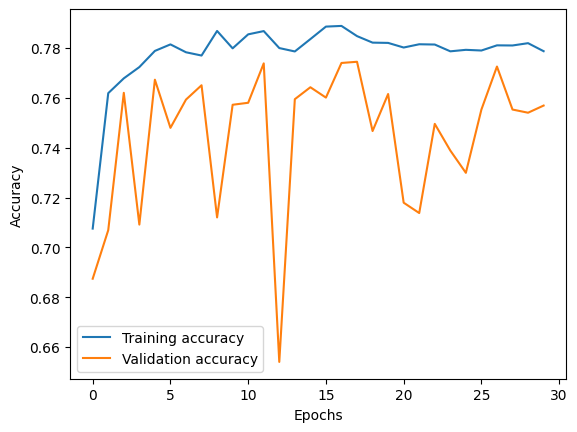

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

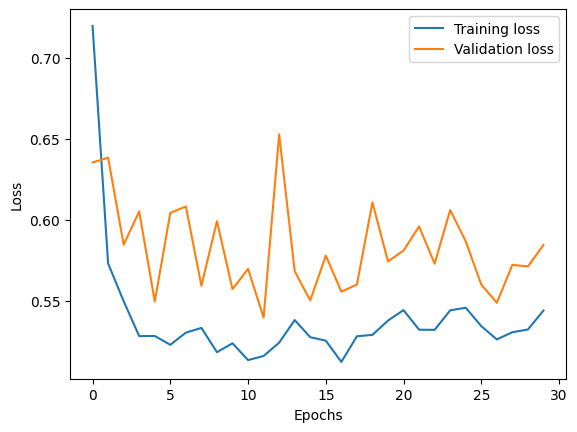

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

Accuracy: 0.762606


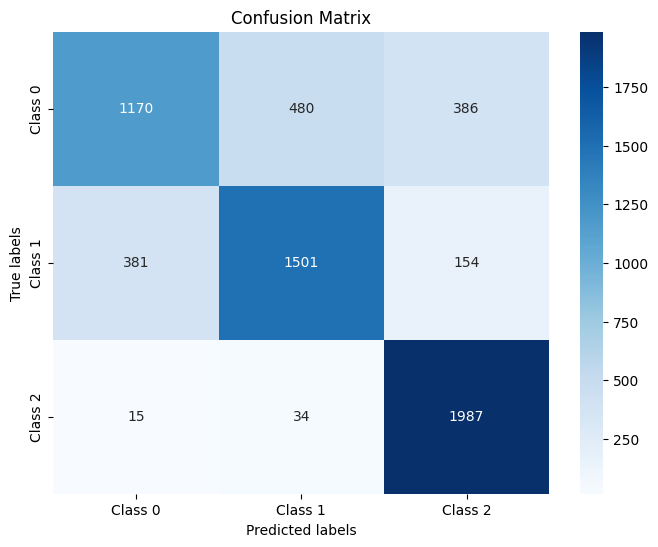

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test1.argmax(axis=1), pred.argmax(axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test1.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.57      0.65      2036
           1       0.74      0.74      0.74      2036
           2       0.79      0.98      0.87      2036

    accuracy                           0.76      6108
   macro avg       0.76      0.76      0.75      6108
weighted avg       0.76      0.76      0.75      6108



**Without Dropout**

In [ ]:
# Model with Attention Layer
def create_model():
    # input layer of model for brain signals
    inputs = tf.keras.Input(shape=(X_train_re.shape[1], X_train_re.shape[2]))
    #inputs = tf.keras.Input(shape=(1,42370))

    gru1_1 = GRU(2048, return_sequences=True)(inputs)

    gru1_2 = GRU(1024, return_sequences=True)(gru1_1)

    gru1_3 = GRU(512, return_sequences=True)(gru1_2)
    #concat = Concatenate()([gru1_3, gru2_3, gru3_3])

    # Apply Attention Layer
    #attention_output = AttentionLayer()(gru1_2)

    # Concatenate Attention Output and Concat
    #attention_concat = Concatenate()([concat, attention_output])

    #flatten = Flatten()(gru1_)

    rnn1 = SimpleRNN(128)(gru1_3)

    #rnn4 = SimpleRNN(32, return_sequences= True)(rnn1)

    output1 = Dense(32, activation='relu')(rnn1)

    outputs = Dense(3, activation='softmax')(output1)

    model = Model(inputs=inputs, outputs=outputs)
    print(model.summary())
    return model

In [ ]:
#cretaing model
rnnmodel = create_model()
#Compiling model
rnnmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy', dtype=None),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 1, 2048)             │      13,209,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 1, 1024)             │       9,443,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 1, 512)              │       2,362,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,101,571 (95.75 MB)

 Trainable params: 25,101,571 (95.75 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
history = rnnmodel.fit(X_train_re, y_train, epochs=30, batch_size=64, validation_data=(X_val_re, y_val))

Epoch 1/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 73s 220ms/step - AUC: 0.8478 - Precision: 0.7325 - Recall: 0.6836 - accuracy: 0.7105 - loss: 0.7417 - val_AUC: 0.8912 - val_Precision: 0.7409 - val_Recall: 0.7390 - val_accuracy: 0.7405 - val_loss: 0.6012
Epoch 2/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 62s 216ms/step - AUC: 0.9082 - Precision: 0.7761 - Recall: 0.7665 - accuracy: 0.7729 - loss: 0.5308 - val_AUC: 0.9032 - val_Precision: 0.7658 - val_Recall: 0.7548 - val_accuracy: 0.7620 - val_loss: 0.5649
Epoch 3/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 62s 216ms/step - AUC: 0.9176 - Precision: 0.7967 - Recall: 0.7846 - accuracy: 0.7916 - loss: 0.5070 - val_AUC: 0.9060 - val_Precision: 0.7718 - val_Recall: 0.7170 - val_accuracy: 0.7521 - val_loss: 0.5485
Epoch 4/30
287/287 ━━━━━━━━━━━━━━━━━━━━ 62s 216ms/step - AUC: 0.9208 - Precision: 0.7995 - Recall: 0.7846 - accuracy: 0.7926 - loss: 0.4961 - val_AUC: 0.8997 - val_Precision: 0.7702 - val_Recall: 0.7649 - val_accuracy: 0.7686 - val_loss: 0.5817
Epoch 5/30
287/287 ━

In [ ]:
pred=rnnmodel.predict(X_test1_re)

191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step


Text(0, 0.5, 'Accuracy')

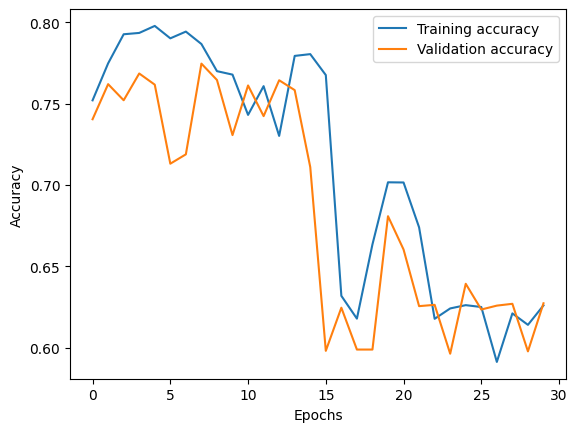

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

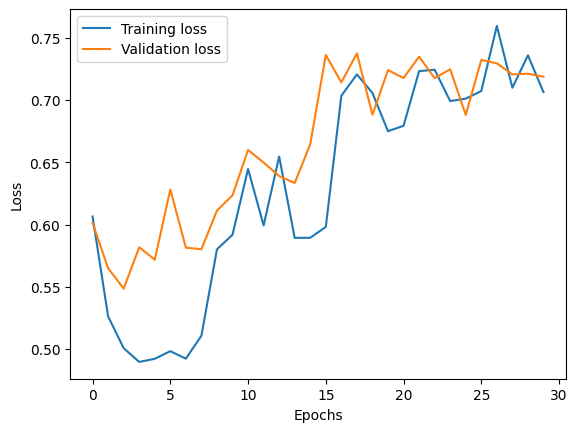

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

Accuracy: 0.628684


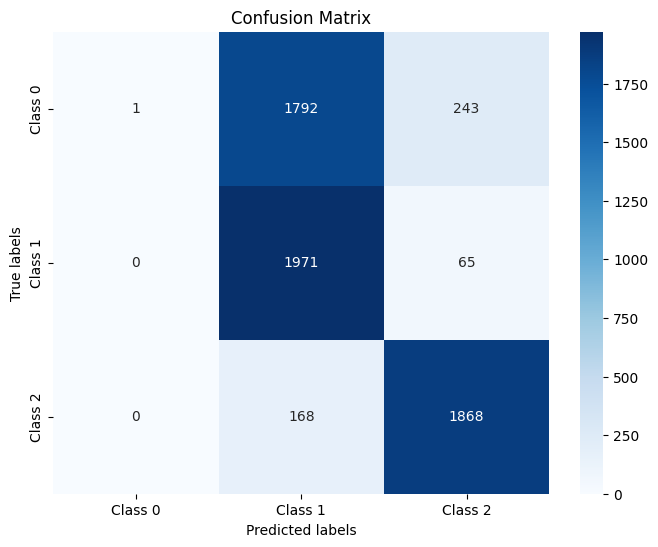

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test1.argmax(axis=1), pred.argmax(axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test1.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2036
           1       0.50      0.97      0.66      2036
           2       0.86      0.92      0.89      2036

    accuracy                           0.63      6108
   macro avg       0.79      0.63      0.52      6108
weighted avg       0.79      0.63      0.52      6108



**Concatenation**

**LSTM**

In [ ]:
def lstm():
  inputs = tf.keras.Input(shape=(X_train_re.shape[1], X_train_re.shape[2]))
  lstm_1 = LSTM(2048, dropout=0.2)(inputs)
  lstm_2 = LSTM(1024, dropout=0.2)(lstm_1)
  lstm_3 = LSTM(512, dropout=0.2)(lstm_2)
  lstm_4 = LSTM(256, dropout=0.2)(lstm_3)

  outputs_1 = Dense(32, activation='relu')(lstm_4)
  outputs = Dense(3, activation='softmax')(outputs_1)

  model = Model(inputs=inputs, outputs=outputs)

  print(model.summary())
  return model

In [ ]:
lstmmo = lstm()
lstmmo.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy', dtype=None),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

ValueError: Input 0 of layer "lstm_8" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 2048)

In [ ]:
import keras
from keras.utils import plot_model
plot_model(lstmmo)

In [ ]:
history = lstmmo.fit(X_train_re, y_train, epochs=30, batch_size=32, validation_data=(X_val_re, y_val))

**Model saving**

In [ ]:
lstmmo.save('lstmmo_Priya.keras')

In [ ]:
pred=lstmmo.predict(X_test1_re)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

**GRU**

In [ ]:
def gru():
    inputs = tf.keras.Input(shape=(1,100))
    gru = GRU(512,dropout=0.2)(inputs)

    #flatten = Flatten()(gru)
    outputs = Dense(3, activation='softmax')(gru)

    model = Model(inputs=inputs, outputs=outputs)

    print(model.summary())
    return model

In [ ]:
grumodel = gru()
grumodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy', dtype=None),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_6 (GRU)                          │ (None, 512)                 │         943,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 944,643 (3.60 MB)

 Trainable params: 944,643 (3.60 MB)

 Non-trainable params: 0 (0.00 B)

None


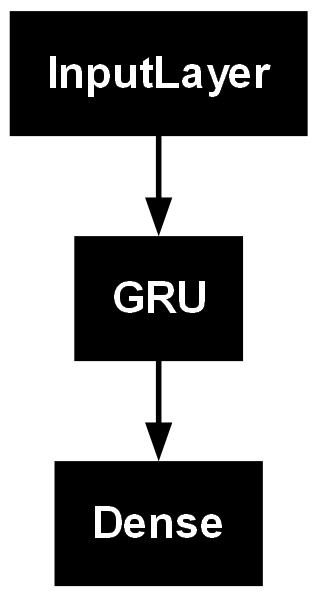

In [ ]:
import keras
from keras.utils import plot_model
plot_model(grumodel)

In [ ]:
history = grumodel.fit(X_train_re, y_train, epochs=30, batch_size=32, validation_data=(X_val_re, y_val))

Epoch 1/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - AUC: 0.8982 - Precision: 0.7905 - Recall: 0.6924 - accuracy: 0.7595 - loss: 0.5835 - val_AUC: 0.9018 - val_Precision: 0.7562 - val_Recall: 0.7262 - val_accuracy: 0.7473 - val_loss: 0.5531
Epoch 2/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - AUC: 0.9194 - Precision: 0.7962 - Recall: 0.7666 - accuracy: 0.7848 - loss: 0.5000 - val_AUC: 0.9021 - val_Precision: 0.7584 - val_Recall: 0.7492 - val_accuracy: 0.7548 - val_loss: 0.5493
Epoch 3/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - AUC: 0.9231 - Precision: 0.8037 - Recall: 0.7854 - accuracy: 0.7973 - loss: 0.4888 - val_AUC: 0.9117 - val_Precision: 0.7756 - val_Recall: 0.7620 - val_accuracy: 0.7713 - val_loss: 0.5256
Epoch 4/30
574/574 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - AUC: 0.9229 - Precision: 0.8025 - Recall: 0.7839 - accuracy: 0.7950 - loss: 0.4901 - val_AUC: 0.9142 - val_Precision: 0.7789 - val_Recall: 0.7651 - val_accuracy: 0.7729 - val_loss: 0.5187
Epoch 5/30
574/574 ━━━━━━━━

**Model saving**

In [ ]:
grumodel.save('grumodel.keras')

In [ ]:
pred=grumodel.predict(X_test1_re)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test1.argmax(axis=1), pred.argmax(axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test1.argmax(axis=1), pred.argmax(axis=1)))

**BidirectionLSTM**

In [ ]:
def lstm():
    inputs = tf.keras.Input(shape=(X_train.shape[1], X_train.shape[2]))
    lstm_1 = Bidirectional(LSTM(512),dropout=0.2)(inputs)

    lstm_4 = Bidirectional(LSTM(32, activation='relu',dropout=0.2))(lstm_1)

    outputs = Dense(3, activation='softmax')(lstm_4)

    model = Model(inputs=inputs, outputs=outputs)

    print(model.summary())
    return model

In [ ]:
lstmmodel = lstm()
lstmmodel.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=[tf.keras.metrics.CategoricalAccuracy(name='accuracy', dtype=None),
                  tf.keras.metrics.Recall(name='Recall'),
                  tf.keras.metrics.Precision(name='Precision'),
                  tf.keras.metrics.AUC( num_thresholds=200,
                                        curve="ROC",
                                        summation_method="interpolation",
                                        name="AUC",
                                        dtype=None,
                                        thresholds=None,
                                        multi_label=True,
                                       label_weights=None,)])

In [ ]:
import keras
from keras.utils import plot_model
plot_model(lstmmodel)

In [ ]:
history = lstmmodel.fit(X_train_re, y_train, epochs=20, batch_size=32, validation_data=(X_val_re, y_val))

In [ ]:
lstmmodel.save('lstmmodel.keras')

In [ ]:
pred=lstmmodel.predict(X_test1_re)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training accuracy','Validation accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training loss','Validation loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %3f' % accuracy_score(y_test1.argmax(axis=1), pred.argmax(axis=1)))